In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings


In [3]:
df=pd.read_csv(r"C:\Users\Dell\Documents\DSA\Internship\StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math score'],axis=1)

In [6]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
Y=df['math score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())




Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [10]:
num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_trans=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_trans,cat_cols),
        ("StandardScaler",num_trans,num_cols),
    ]
)

In [11]:
x=preprocessor.fit_transform(X) 

In [12]:
x.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=20)

In [14]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2


In [15]:
models={
    "LR":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor() 
}

model_list=[]
r2_lists=[]

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train , y_train_pred)

    model_test_mae , model_test_rmse , model_test_r2=evaluate_model(y_test , y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print("Model Performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print(" -R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------------------")

    print("Model performance for Test Set")
    print("- Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_lists.append(model_test_r2)
    
    print("="*35)
    print('\n')

LR
Model Performance for Training Set
- Root Mean Squared Error: 5.2761
- Mean Absolute Error:4.2055
 -R2 Score: 0.8796
----------------------------------------------
Model performance for Test Set
- Root Mean Squared Error:5.5396
- Mean Absolute Error: 4.4370
- R2 Score: 0.8625


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.4936
- Mean Absolute Error:5.1109
 -R2 Score: 0.8177
----------------------------------------------
Model performance for Test Set
- Root Mean Squared Error:6.5424
- Mean Absolute Error: 5.2077
- R2 Score: 0.8082


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.2763
- Mean Absolute Error:4.2044
 -R2 Score: 0.8796
----------------------------------------------
Model performance for Test Set
- Root Mean Squared Error:5.5410
- Mean Absolute Error: 4.4382
- R2 Score: 0.8625


DT
Model Performance for Training Set
- Root Mean Squared Error: 0.2500
- Mean Absolute Error:0.0125
 -R2 Score: 0.9997
----------------------------

In [17]:
pd.DataFrame(list(zip(model_list,r2_lists)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LR,0.862527
2,Ridge,0.862454
4,RF,0.813053
1,Lasso,0.808249
3,DT,0.676171


In [18]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 86.25


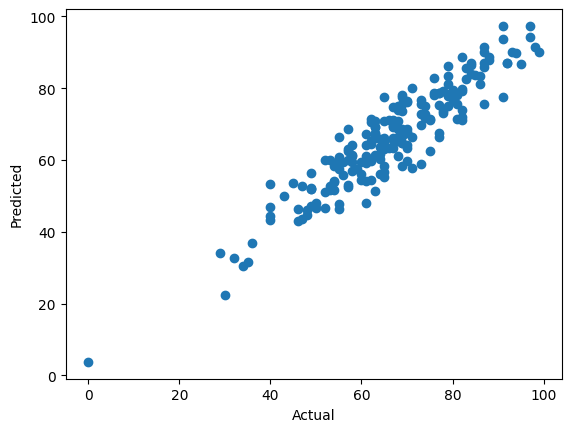

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

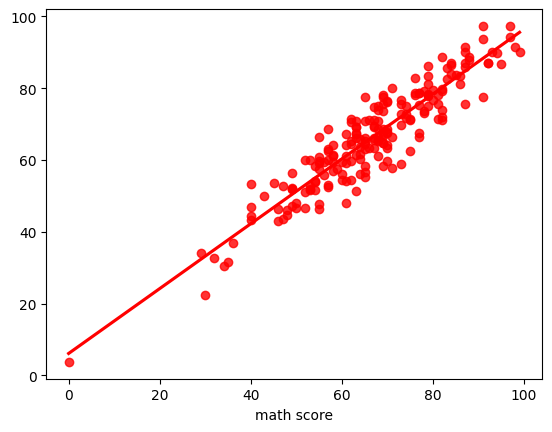

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None , color='red');


In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
890,86,83.482779,2.517221
694,49,51.902578,-2.902578
798,69,67.336689,1.663311
147,73,69.622232,3.377768
858,52,50.993922,1.006078
...,...,...,...
150,62,71.543858,-9.543858
279,73,58.822703,14.177297
544,64,56.091990,7.908010
568,63,51.414207,11.585793
